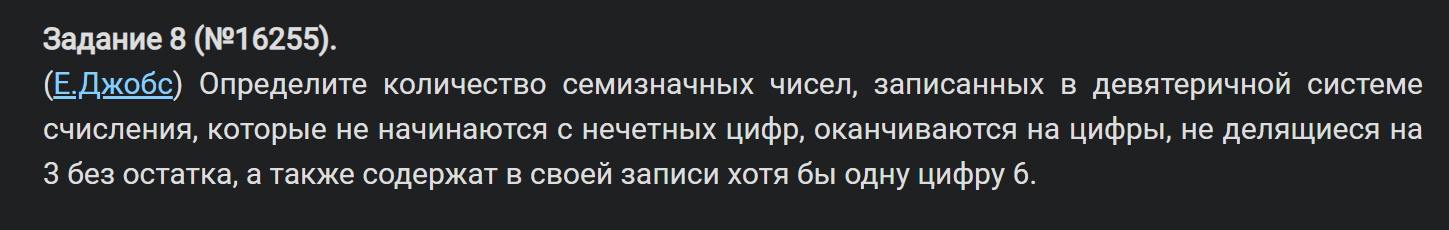

In [2]:
from itertools import product
arr = product('012345678', repeat = 7)
counter = 0
for x in arr:
    if x[0] != '0' and int(x[0]) % 2 == 0 and int(x[-1]) % 3 > 0 and x.count('6') >= 1:
        counter += 1
print(counter)
# 827_352 -

827352


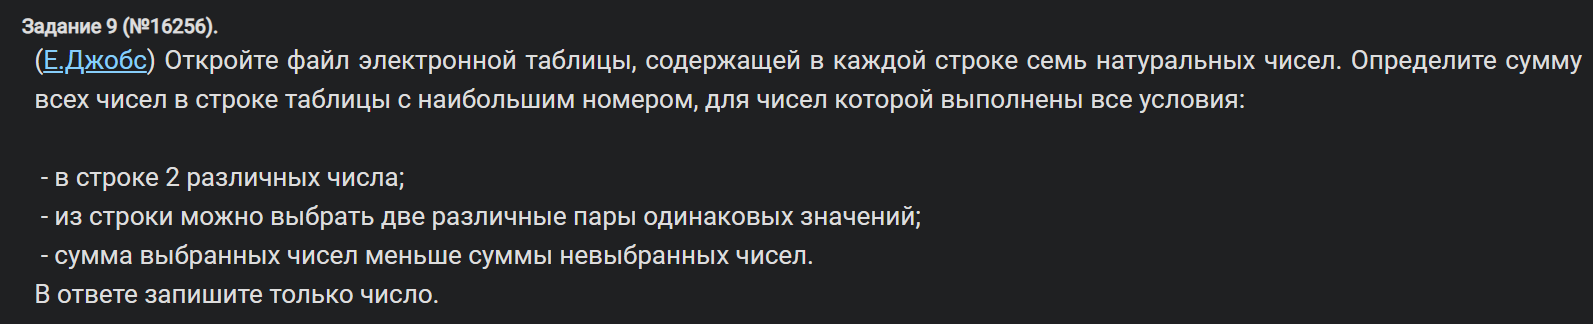

In [28]:
from collections import Counter
def cond(count: Counter):
    counter = 0
    sum1 = 0
    sum2 = 0
    for v, c in dict(sorted(count.items())).items():
        if c >= 2 and counter < 2:
            sum1 += v * 2
            sum2 += v * (c-2)
            counter += 1
        else:
            sum2 += v * c
    return sum1 < sum2
with open('09.csv') as f:
    data = [[int(x) for x in line.strip().split(';') if x] for line in f.readlines()]
sum1 = 0
for line in data:
    count = Counter(line)
    if len(count.keys()) >= 2 and sum(v >= 2 for v in count.values()) >= 2 and cond(count):
        sum1 = sum(line)
print(sum1)

1700


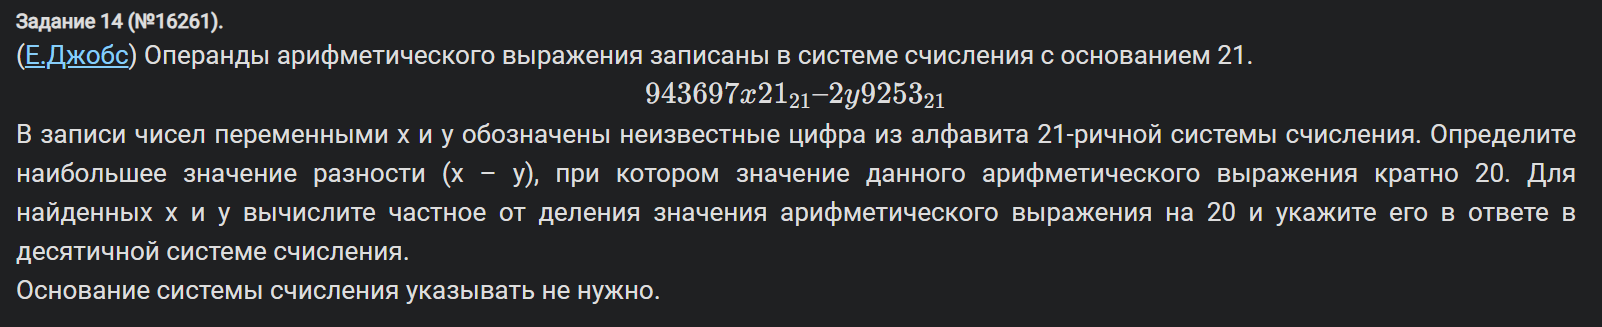

In [32]:
def F(arr,base):
    return sum(k * base**i for i, k in enumerate(reversed(arr)))
maxx = -9999999999
div = 0
for x in range(21):
    for y in range(21):
        if (F([9,4,3,6,9,7,x,2,1],21) - F([2,y,9,2,5,3],21)) % 20 == 0:
            if x - y > maxx:
                maxx = x - y
                div = (F([9,4,3,6,9,7,x,2,1],21) - F([2,y,9,2,5,3],21)) // 20
print(maxx)
print(div)

20
17394273143


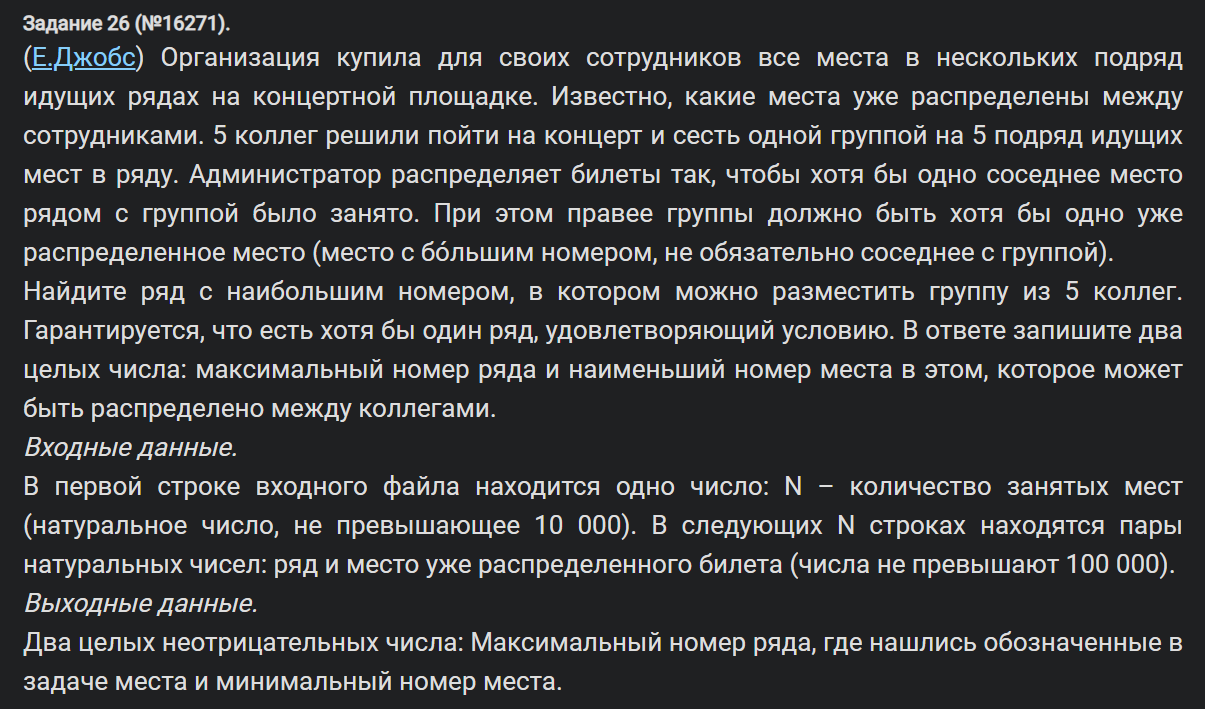

In [ ]:
#  vvvvv         vvvvvvvvv     xxxxx
# ooooooxoxoxoxoxoooooooooxoooxooooooooooo

In [45]:
with open('26.txt') as f:
    N = int(f.readline())
    m = [list(map(int, line.split())) for line in f.readlines()]
# Сортируем по убыванию ряда и по возрастанию места чтоб не париться с проверками и смотреть последовательно
m.sort(key=lambda x: (-x[0], x[1]))
prev = -1, -1
for row, num in m:
    # если впервые проверяем ряд, смотрим есть ли 5 свободных мест до первого занятого
    if prev[0] != row and num >= 6:
        print(row, num - 5)
        break
    # если повторно проверяем ряд смотрим есть ли 5 свободных местом между текущим и предыдущим
    if prev[0] == row and prev[1] - num >= 6:
        print(row, prev[1] + 1)
        break
    prev = row, num

998 10


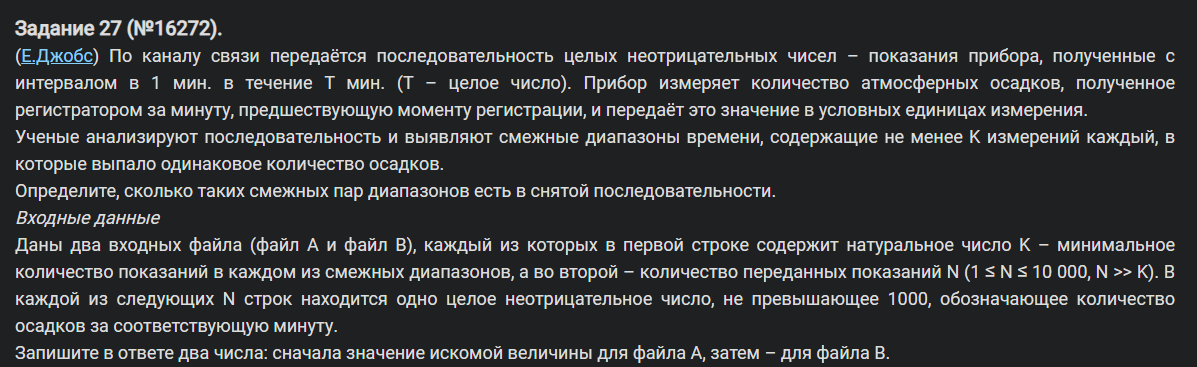

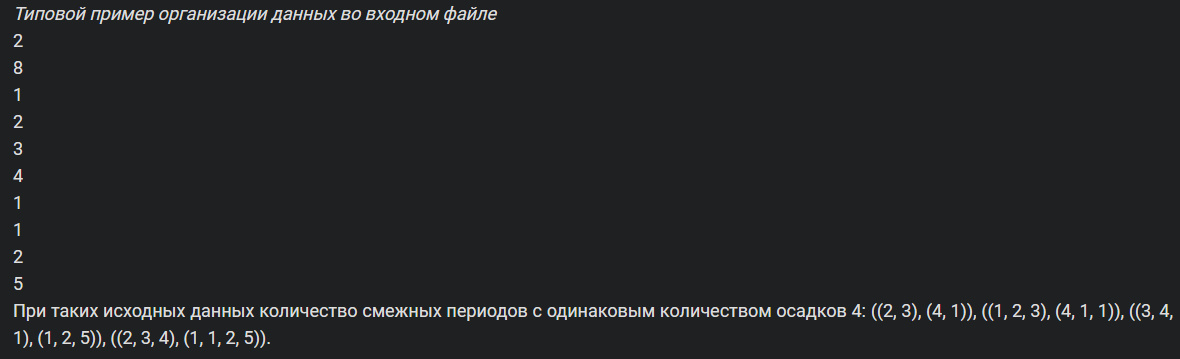

In [42]:
K=2
N=8
[1,(2,3),(4,1),1,2,5]
[(1,2,3),(4,1,1),2,5]
[1,2,(3,4,1),(1,2,5)]
[1,(2,3,4),(1,1,2,5)]


In [68]:
with open('27B.txt') as f:
    k, n, *v = map(int, f.readlines())

In [50]:
# Очень медленно
counter = 0
for i in range(n):
    for j in range(i+k, n):
        for m in range(j+k, n + 1):
            if sum(v[i:j]) == sum(v[j:m]):
                counter += 1
print(counter)

770


In [ ]:
# Быстрее, но всё ещё медленно
counter = 0
presum = [0] * (n + 1)
for i in range(n):
    presum[i+1] = presum[i] + v[i]
for i in range(n):
    for j in range(i+k, n):
        for m in range(j+k, n + 1):
            if presum[j] - presum[i] == presum[m] - presum[j]:
                counter += 1
print(counter)

In [69]:
# 1 2 3 4 1 1 2 5
# [(1 2 3) (4 1 1)] 2 5
# Быстро
counter = 0
presum = [0] * (n + 1)
for i in range(n):
    presum[i+1] = presum[i] + v[i]
for i in range(n):
    jj = i + 2*k
    for j in range(i+k, n):
        s1 = presum[j] - presum[i]
        for m in range(jj, n + 1):
            if m - j < k:
                break
            s2 = presum[m] - presum[j]
            if s1 <= s2:
                if s1 == s2:
                    counter += 1
                jj = max(m, j+k+1)
                break
print(counter)

64386
